# Homework 3 Problem 4 (Exercise 13.3)

AMath 584, Autumn Quarter 2016.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def p_sum(t,c,verbose=False):
    """
    Evaluate p(t) where p is the polynomial defined by coefficients c.
    Uses natural sum in terms of monomials.
    """
    p = c[0]
    for j in range(1,len(c)):
        p = p + c[j]*t**j
        if verbose: 
            print "j = %2i, partial sum = %30.20f" % (j,p)
    return p

In [3]:
def p_horner(t,c,verbose=False):
    """
    Evaluate p(t), where p is the polynomial defined by coefficients c.
    Uses Horner's method.
    """
    degree = len(c) - 1
    p = c[degree]
    for j in range(degree-1,-1,-1):
        p = p*t + c[j]
        if verbose: 
            print "j = %2i, partial sum = %30.20f" % (j,p)
    return p

In [4]:
# coefficients:
c = [-512, 2304, -4608, 5376, -4032, 2016, -672, 144, -18, 1]

In [5]:
x = 2.1
p = p_sum(x,c,verbose=True)
p_true = 1e-9
print '\nThe computed value is %20.15e' % p
print 'The correct value is  %20.15e' % p_true
relative_error = abs((p-p_true)/p_true)
print 'The relative error is %g' % relative_error

j =  1, partial sum =      4326.40000000000054569682
j =  2, partial sum =    -15994.87999999999738065526
j =  3, partial sum =     33792.25600000000849831849
j =  4, partial sum =    -44622.48320000000239815563
j =  5, partial sum =     37712.99296000001777429134
j =  6, partial sum =    -19921.84035199999925680459
j =  7, partial sum =      6013.83463840001058997586
j =  8, partial sum =      -794.28004657999190385453
j =  9, partial sum =         0.00000000100840225059

The computed value is 1.008402250590734e-09
The correct value is  1.000000000000000e-09
The relative error is 0.00840225


Note that we only get 2 or 3 correct digits.  Looking at the partial sums, we can see that they grow to be more than $10^{13}$ times larger than the solution, so we expect to lose about 13 digits from the 16 digits we might hope for.

Horner's method does only slightly better...

In [6]:
p = p_horner(x,c,verbose=True)
p_true = 1e-9
print '\nThe computed value is %20.15e' % p
print 'The correct value is  %20.15e' % p_true
relative_error = abs((p-p_true)/p_true)
print 'The relative error is %g' % relative_error

j =  8, partial sum =       -15.90000000000000035527
j =  7, partial sum =       110.60999999999999943157
j =  6, partial sum =      -439.71899999999999408828
j =  5, partial sum =      1092.59009999999989304342
j =  4, partial sum =     -1737.56078999999999723514
j =  3, partial sum =      1727.12234099999977843254
j =  2, partial sum =      -981.04308390000051076640
j =  1, partial sum =       243.80952380999906381476
j =  0, partial sum =         0.00000000099805674836

The computed value is 9.980567483580671e-10
The correct value is  1.000000000000000e-09
The relative error is 0.00194325


## Plot solution near $x=2$:

In [7]:
# points to evaluate:
x = linspace(1.95,2.05,101)
print "The first three points are ",x[:3]

The first three points are  [ 1.95   1.951  1.952]


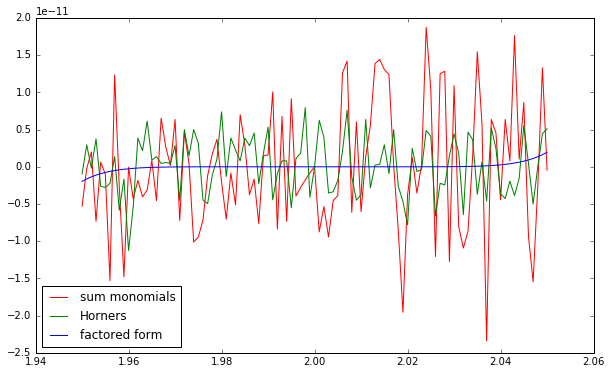

In [8]:
figure(figsize=(10,6))
plot(x, p_sum(x,c), 'r', label='sum monomials')
plot(x, p_horner(x,c), 'g', label='Horners')
plot(x, (x-2.)**9, 'b',label='factored form')
legend(loc='lower left')

Note that the vertical axis is scaled by `1e-11` so all of these values are very small.  The true polynomial is very flat near a high-order root!